In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
#Import Data
data=np.loadtxt('ex2data2.txt',delimiter=',')
X=data[:,:-1]
y=data[:,-1]
y=y[:,np.newaxis]
m=data.shape[0]
n=data.shape[1]

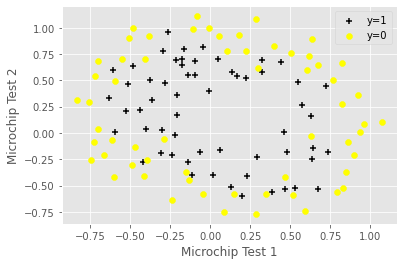

In [3]:
#Plot data
style.use('ggplot')
pos= y==1
neg= y==0
pos=pos.reshape(m)
neg=neg.reshape(m)
plt.scatter(X[pos,0],X[pos,1],marker='+',c='black',label='y=1')
plt.scatter(X[neg,0],X[neg,1],marker='o',c='yellow',label='y=0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='best')



In [4]:
#Sigmoid Function
def sigmoid(z):
    sig= 1/(1+np.exp(-z))
    return sig

In [5]:
#Intialization
x0=np.ones((m,1))
X=np.concatenate((x0,X), axis=1)
theta=np.zeros((n,1))


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
#Import Data
data=np.loadtxt('ex2data2.txt',delimiter=',')
X=data[:,:-1]
y=data[:,-1]
y=y[:,np.newaxis]
m=data.shape[0]
n=data.shape[1]

#Sigmoid Function
def sigmoid(z):
    sig= 1/(1+np.exp(-z))
    return sig


#Intialization
x0=np.ones((m,1))
X=np.concatenate((x0,X), axis=1)
theta=np.zeros((n,1))

#Compute Cost and grad
iterations=100000
alpha= 0.001
lamda=100  #regularization factor
z=np.matmul(X,theta)
h=sigmoid(z)
reg_cost= (lamda/(2*m))*sum(theta[1:,0]**2)
cost= sum((-y*np.log(h)-(1-y)*np.log(1-h)))/m + reg_cost

for i in range(iterations):
    reg_theta= (lamda/m)*theta
    #print(reg_theta.shape)
    grad= sum((h-y)*X)
    grad= grad.reshape((n,1))
    
    grad= grad + reg_theta
    grad[0,0]= grad[0,0]- reg_theta[0,0]
    
    theta= theta-(alpha/m)*grad
    z=np.matmul(X,theta)
    
    h=sigmoid(z)
    cost=(-1/m)*sum(y*np.log(h)+(1-y)*np.log(1-h)) + reg_cost
    

In [7]:
#Training accuracy
p=np.zeros((m,1))
h_temp=h.reshape(m)
p[h_temp>=0.5]=1
acc_hyp= p==y
acc_trained= (acc_hyp.sum()/m)*100
print('training accuracy= ',acc_trained)

training accuracy=  54.23728813559322


In [8]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X,y)
h_nb=model.predict(X)

c:\program files (x86)\python38-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [11]:
#Training Accuracy
from sklearn.metrics import accuracy_score
acc_nb = accuracy_score(h_nb,y)*100
print('training accuracy using NaiveBayes= ',acc_nb)

training accuracy using NaiveBayes=  74.57627118644068
